![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)

# <font color='Blue'>Maratona da Ciência de Dados</font>

### <font color='GREY'> Sistema de Classificação de Risco para Concessão de Empréstimo </font>  




![alt text](https://webcomicms.net/sites/default/files/clipart/144257/animated-computer-pictures-144257-637982.gif)
![alt text](https://blog.megaconsultas.com.br/wp-content/uploads/2019/06/Recuperar-o-Score-de-Cr%C3%A9dito.gif)


# <font color='Black'> **Aula 1 - Usando Dados para Resolver Problemas com Ciência de Dados** </font>

#1° Problema de Negócio 

Nesse caso prático, nós precisamos construir um Sistema de classificação de Risco do cliente para aprovação de empréstimos.


![alt text](https://www.goias.gov.br/images/uploads/2017/04/Risco-de-Cr%C3%A9dito-finan%C3%A7as-contas.png)

##### **Fonte dos Dados**

Usaremos a base de dados "**risco.csv**" originada por meio dos dados da **UCI Machine Learning**.

 Nesse portal a gente consegue realizar o download de vários datasets reais de empresas de todo o Mundo.

**Link**:

https://archive.ics.uci.edu/ml/index.php

###### **Arquitetura dos Dados** (AD)

* **id_cliente**  : Número de identificação única do cliente
* **inad**        : Índice de inadimplência do cliente
* **Saldo_contas**: Índice referente aos saldos das contas corrente, poupança e aplicações do cliente
* **Class_Renda** : Índice referente à classificação do cliente de acordo com sua renda.
* **Anotações**   : Índice referente às anotações externas à empresa, tais como anotações SERASA / SPC / BACEN 
* **Risco**       : Risco do Cliente atribuído dadas as variáveis de análise do cliente

# 2° Análise Exploratória dos Dados


In [1]:
# Importando Bibliotecas Essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

In [2]:
# Se conectando com os dados - Nesse caso, a Fonte de Dados é um Arquivo
dataset = pd.read_csv('risco.csv')

In [3]:
# Imprime na Tela os primeiros registros
dataset.head()

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,0,5.1,3.5,1.4,0.2,Risco_Alto
1,1,4.9,3.0,1.4,0.2,Risco_Alto
2,2,4.7,3.2,1.3,0.2,Risco_Alto
3,3,4.6,3.1,1.5,0.2,Risco_Alto
4,4,5.0,3.6,1.4,0.2,Risco_Alto


In [4]:
# Informações do Dataset - Tipo das Variáveis, Quantidade de linhas (registros) e colunas (variáveis/features)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_cliente       150 non-null    int64  
 1   anot_cadastrais  150 non-null    float64
 2   indice_inad      150 non-null    float64
 3   class_renda      150 non-null    float64
 4   saldo_contas     150 non-null    float64
 5   Risco            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#Verifica as dimensões do dataset (antes de vírgula são linhas    ,     depois da vírgula são colunas)
dataset.shape

(150, 6)

In [6]:
# Cria uma função para imprimir na tela o resultado da função SHAPE
print(f"Dataset tem {dataset.shape[0]} linhas e {dataset.shape[1]} colunas.")

Dataset tem 150 linhas e 6 colunas.


In [7]:
#Estatísticas descritivas das variáveis numéricas
dataset.describe()

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
# Tabela de Frequência da Variável "risco" - Nossa Classe ou Label ou Target
dataset['Risco'].value_counts()


Risco_Medio    50
Risco_Baixo    50
Risco_Alto     50
Name: Risco, dtype: int64

In [9]:
# Forma adicional de criar a Tab. de Frequência
dataset.Risco.value_counts()

Risco_Medio    50
Risco_Baixo    50
Risco_Alto     50
Name: Risco, dtype: int64

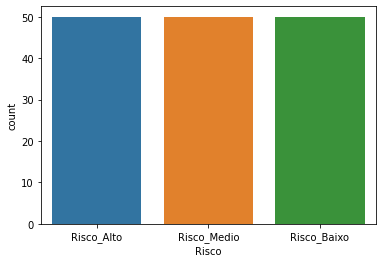

In [10]:
# Cria um gráfico de barras da variável Target
sns.countplot(dataset['Risco'])

In [11]:
# Check for missing values
dataset.isna().sum()

id_cliente         0
anot_cadastrais    0
indice_inad        0
class_renda        0
saldo_contas       0
Risco              0
dtype: int64

In [12]:
#Eliminar a coluna de identificação, pois ela não é variável explicativa, é somente a identificação do cliente7
dataset = dataset.drop(columns='id_cliente')

In [13]:
#Printa o dataset na tela
dataset

,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,5.1,3.5,1.4,0.2,Risco_Alto
1,4.9,3.0,1.4,0.2,Risco_Alto
2,4.7,3.2,1.3,0.2,Risco_Alto
3,4.6,3.1,1.5,0.2,Risco_Alto
4,5.0,3.6,1.4,0.2,Risco_Alto
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Risco_Baixo
146,6.3,2.5,5.0,1.9,Risco_Baixo
147,6.5,3.0,5.2,2.0,Risco_Baixo
148,6.2,3.4,5.4,2.3,Risco_Baixo


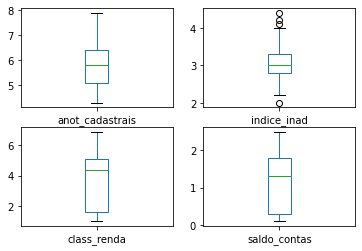

In [14]:
# Cria um gráfico tipo box and whisker plots (o famoso boxplot)
from matplotlib import pyplot
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

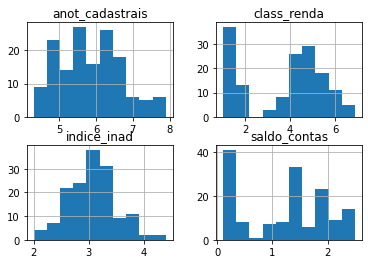

In [15]:
#cria um gráfico conhecido como histohrama
dataset.hist()
plt.show()


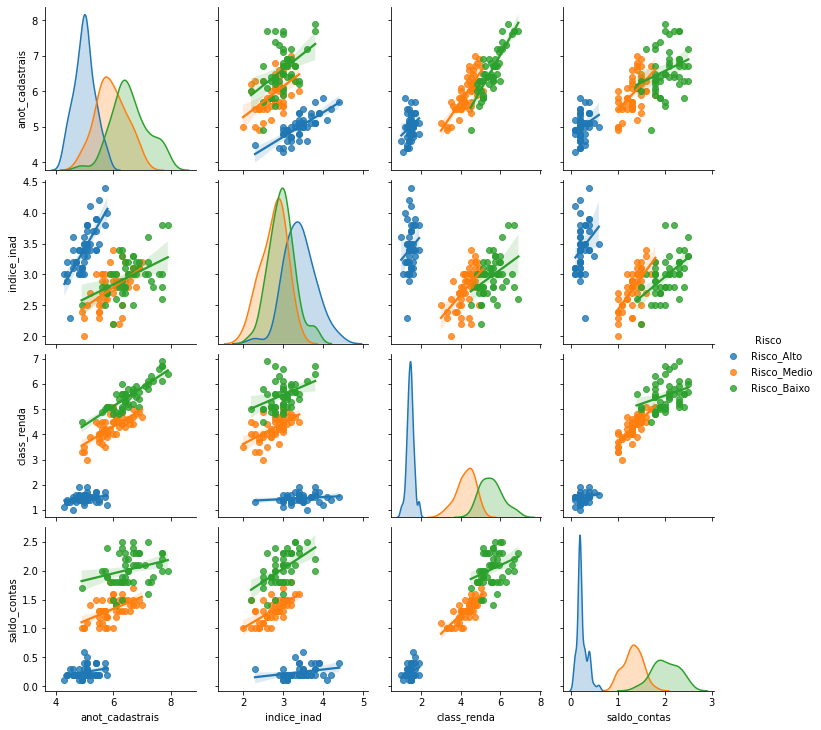

In [16]:
# Criação do Gráfico de dispersão (scatter) conhecido como pairplot
sns.pairplot(dataset, hue='Risco', kind="reg") # kind=reg é a reta de regressão

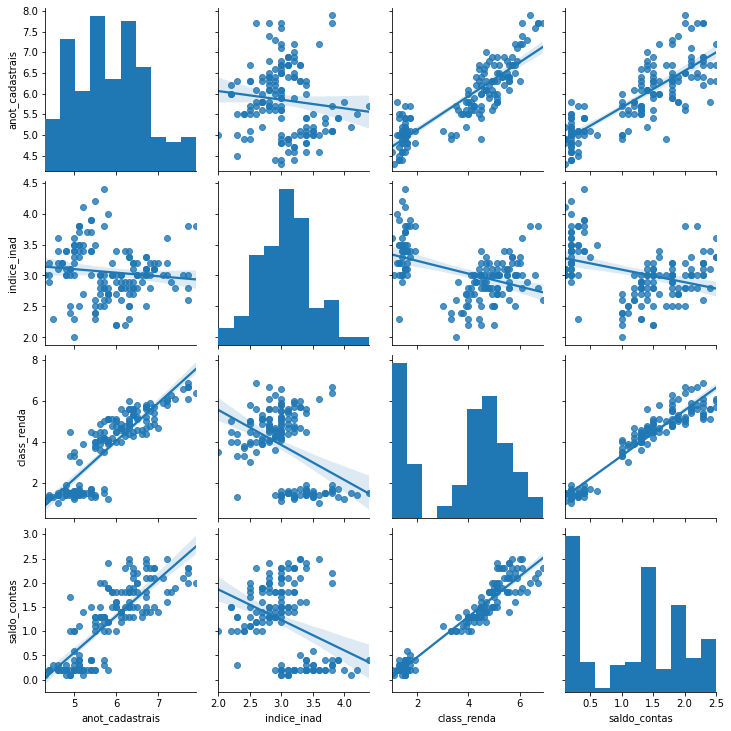

In [17]:
# Criação do Gráfico de dispersão sem agregar pelo TARGET
sns.pairplot(dataset,kind="reg")

# 3° Pré-Processamento dos Dados

In [18]:
#3 Separando as Variáveis de Entrada e Saída do Modelo
X = dataset.iloc[:,:-1].values  #variáveis independentes
y = dataset.iloc[:,-1].values  #Target/labe/class/vairável dependente

In [19]:
#Print das variáveis X e Y
print("\nVariáveis de Entrada da avaliação:\n\n", X[:3])
print("\nRisco - Variável a ser Predita :\n\n", y[:3])


Variáveis de Entrada da avaliação:

 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]

Risco - Variável a ser Predita :

 ['Risco_Alto' 'Risco_Alto' 'Risco_Alto']


In [20]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [21]:
y

array(['Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Medio', 'Risco_Medio',
       'Risco_Medio', 'Risco_Medio', 'Risco_Medio', 'Risco_Medio',
       'Risco_Medio', 'Risco_Medio', 'Risco_Medio', 'Risco_Medio',
       'Risco_Medio', 'Risco_Medio', 'Risco_M

### Separando os dados entre Treino e Teste

In [22]:
#Divide o dataset em Train and Test 
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2, random_state = 7) 

In [23]:
print("Dados de Treino :\n----------------\n")
print("X = \n", X_train[:2])
print("y = \n", y_train[:2])

print("\n\nDados de Teste :\n----------------\n")
print("X = \n",X_test[:2])
print("y = \n", y_test[:2])

Dados de Treino :
----------------

X = 
 [[6.2 2.8 4.8 1.8]
 [5.7 2.6 3.5 1. ]]
y = 
 ['Risco_Baixo' 'Risco_Medio']


Dados de Teste :
----------------

X = 
 [[5.9 3.  5.1 1.8]
 [5.4 3.  4.5 1.5]]
y = 
 ['Risco_Baixo' 'Risco_Medio']


In [24]:
print(f"Shape dos dados de treino é {X_train.shape}")
print(f"Shape dos dados de teste é {X_test.shape}")

Shape dos dados de treino é (120, 4)
Shape dos dados de teste é (30, 4)


### Padronizando as Features - As variáveis explicativas (variáveis de entrada)


# <font color='Black'> **Aula 2 - Construíndo Máquinas Preditivas** </font>

# 4° Construindo a Máquina Preditiva

### 1° Versão da Máquina Preditiva: Criando um **baseline**

Aqui nós vamos criar a primeira versão da Máquina Preditiva. Depois, vamos buscar formas de melhorar a assertividade do modelo. 

In [25]:
# Importando a Biblioteca KNN
from sklearn.neighbors import KNeighborsClassifier
Maquina_Preditiva = KNeighborsClassifier(n_neighbors=30) #[1,10,30,50]



In [26]:
#Treinando a Máquina preditiva com os dados de treino
Maquina_Preditiva = Maquina_Preditiva.fit(X_train,y_train)



In [27]:
#Fazendo novas Previsões com os dados de teste
y_pred = Maquina_Preditiva.predict(X_test)


print("\n---------------------------\n")
print("Valores Reais com dados de teste :\n",y_test)

print("\n---------------------------\n")
print("Valores Preditos com a Máquina Preditiva com dados de Teste :\n",y_pred)


---------------------------

Valores Reais com dados de teste :
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']

---------------------------

Valores Preditos com a Máquina Preditiva com dados de Teste :
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Medio'
 'Risco_Alto' 'Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']


In [28]:
#Função que mostra os hyperparâmetros utilizados na construção da Máquina Preditiva 
Maquina_Preditiva.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(n_neighbors=30)>

#5° Avaliando a Máquina Preditiva

In [29]:
# Calculando a Acurácia
from sklearn import metrics
print("Acurácia da Máquina = ", metrics.accuracy_score(y_test, y_pred)*100)

Acurácia da Máquina =  90.0


In [30]:
# Comparando Real e Predito com dados de Teste
print("\nReal vs Predito \n------------------------------\n")
error_df = pd.DataFrame({"Real" : y_test,
                         "Predito" : y_pred})

error_df.head(5)


Real vs Predito 
------------------------------



,Real,Predito
0,Risco_Baixo,Risco_Baixo
1,Risco_Medio,Risco_Medio
2,Risco_Alto,Risco_Alto
3,Risco_Medio,Risco_Medio
4,Risco_Baixo,Risco_Medio


In [31]:
#Usando a confusion matrix  e o classification report para avaliar a acurácia e demais indicadores
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

print("Acurácia da Máquina = ", metrics.accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)

Acurácia da Máquina =  90.0
[[ 7  0  0]
 [ 0 10  1]
 [ 0  2 10]]
              precision    recall  f1-score   support

  Risco_Alto       1.00      1.00      1.00         7
 Risco_Baixo       0.83      0.91      0.87        11
 Risco_Medio       0.91      0.83      0.87        12

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



### 2° Versão da Máquina Preditiva: Máquina Definitiva 

In [32]:
# Importando a Biblioteca do SVM
from sklearn.svm import SVC
classifier = SVC(kernel='linear',             # ['linear', 'rbf']
                 gamma= 1e-5  ,               # [1e-1, 1e-2, 1e-3, 1e-5]
                 C=10,                        # [10.0, 100.0, 1000.0, 10000.0]
                 random_state=7)




In [33]:
#Treinando a Máquina com o SVC
classifier.fit(X_train,y_train)



SVC(C=10, gamma=1e-05, kernel='linear', random_state=7)

In [34]:
#Fazendo novas previsões com os dados de teste
y_pred = classifier.predict(X_test)

print("\n---------------------------\n")
print("Predicted Values for Test Set :\n",y_pred)
print("\n---------------------------\n")
print("Actual Values for Test Set :\n",y_test)


---------------------------

Predicted Values for Test Set :
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Baixo' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']

---------------------------

Actual Values for Test Set :
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']


In [35]:
#Imprimindo os hyperparâmetros utilizados na criação da Maquina Preditiva Definitiva
classifier

SVC(C=10, gamma=1e-05, kernel='linear', random_state=7)

In [36]:
# Calculando a Acurácia da Máquina Preditiva
from sklearn import metrics
print("Prediction Accuracy = ", metrics.accuracy_score(y_test, y_pred))

# Comparando valores Reais com Preditos pela Máquina
print("\nActual vs Predicted  \n------------------------------\n")
error_df = pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_pred})

error_df.head(5)

Prediction Accuracy =  0.9333333333333333

Actual vs Predicted  
------------------------------



,Actual,Predicted
0,Risco_Baixo,Risco_Baixo
1,Risco_Medio,Risco_Medio
2,Risco_Alto,Risco_Alto
3,Risco_Medio,Risco_Medio
4,Risco_Baixo,Risco_Baixo


In [37]:

#Usando a confusion matrix e o classification report para avaliar a Máquina
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)

In [38]:
# Imprimindo a Confusion Matrix e o Classification Report
print(cm)
print(cr)

[[ 7  0  0]
 [ 0 11  0]
 [ 0  2 10]]
              precision    recall  f1-score   support

  Risco_Alto       1.00      1.00      1.00         7
 Risco_Baixo       0.85      1.00      0.92        11
 Risco_Medio       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



# <font color='Black'> **Aula 3 - Criando uma Aplicação WEB com sua Máquina Preditiva** </font>

# <font color='Blue'>6° Deploy - Implementando a Maquina Preditiva na WEB</font>


### **Passo a Passo** Implementação do Sistema de Classificação de Risco do Cliente:

**1°** Realizar o download da ferramenta "Visual Studio Code" no link abaixo:

https://code.visualstudio.com/

**2°** Instalar a ferramenta: Clicar em "next" e "finish" (simples assim...)

**3°** Criar um diretório "app" no seu Drive "C"

Ex: **C:\app**

**4°** Fazer o Download da pasta "maratona" disponibilizada na página da maratona e via Canal no Telegram.

**5°** Salvar essa pasta dentro do diretório app. 

Ex: **C:\app\maratona** 



**Obs:** dentro da pasta maratona temos 3 arquivos:

1° risco.csv                           - Nossa fonte de dados

2° app_risco.py                        - Nosso Aplicativo web

3° Sistema_Classificação_Risco.ipynb   - Nosso Script de Criação da Máquina Preditiva

**6°** Abrir o VS Code e clicar no menu "File", depois "Open Folder" e vai navegar até o diretório **"C:\app\maratona"**

**7°** Vai no menu "terminal", depois "New Terminal". Perceba que vai abrir, lá embaixo, um terminal de comando, tipo o "CMD" (tela preta) do windows.

**8°** executar os seguinte comandos:

a) pip install plotly     +  tecla enter

b) pip install streamlit  +  tecla enter


9° Instalar o Anaconda

https://www.anaconda.com/products/individual

**10°** Executar o comando de abertura (no terminal do VS Code), do nosso LINDO sistema:

   **streamlit run app_risco.py**

obs: Nosso sistema vai abrir na WEB. Ver no seu navegador web.

# <font color='Black'> **Aula 4 - O GPS: Se tornando um Cientista de Dados** </font>

# Fim

![alt text](https://miro.medium.com/max/625/1*XBWI6eNVLS_70s1qS46E1w.gif)

## Valeu!

### #Links - Ciência dos Dados <a href="https://linktr.ee/cienciadosdados">https://linktr.ee/cienciadosdados</a>